# Home Credit Final Project

#Setting-Up

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Library load

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score


### Dataset load


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df=pd.read_csv('/content/drive/MyDrive/Rakamin Dataset/application_train.csv')
print("Shape (rows, columns):", df.shape)
df.head()

Shape (rows, columns): (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## Exploratory Data Analysis

### Early EDA

In [5]:
df.dtypes

,0
SK_ID_CURR,int64
TARGET,int64
NAME_CONTRACT_TYPE,object
CODE_GENDER,object
FLAG_OWN_CAR,object
FLAG_OWN_REALTY,object
CNT_CHILDREN,int64
AMT_INCOME_TOTAL,float64
AMT_CREDIT,float64
AMT_ANNUITY,float64


In [6]:
df['NAME_FAMILY_STATUS'].value_counts()

,count
NAME_FAMILY_STATUS,
Married,196432
Single / not married,45444
Civil marriage,29775
Separated,19770
Widow,16088
Unknown,2


In [7]:
df['CODE_GENDER'].value_counts()

,count
CODE_GENDER,
F,202448
M,105059
XNA,4


In [8]:
# Drop rows with 'Unknown' in 'NAME_FAMILY_STATUS'
df = df[df['NAME_FAMILY_STATUS'] != 'Unknown']

Status_of_Marital = []
Married = ['Married', 'Civil marriage']


for i in df['NAME_FAMILY_STATUS']:
    if i in Married:
        Status_of_Marital.append('Married')
    else:
        Status_of_Marital.append('Not Married')

df['Status_of_Marital'] = Status_of_Marital

df.drop(columns='NAME_FAMILY_STATUS', inplace=True)

# Drop rows with 'XNA' in 'CODE_GENDER'
df = df[df['CODE_GENDER'] != 'XNA']
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Status_of_Marital
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Not Married
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Married
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

### Insights Findings

#### Customer Loan Status (General)

In [9]:
Customers= df.groupby('TARGET')['CODE_GENDER'].count().reset_index()
Customers.rename(columns={'CODE_GENDER':'Customers'}, inplace=True)
Customers['Percentage']= round(Customers['Customers'] / Customers['Customers'].sum(), 2)
Customers

,TARGET,Customers,Percentage
0,0,282680,0.92
1,1,24825,0.08


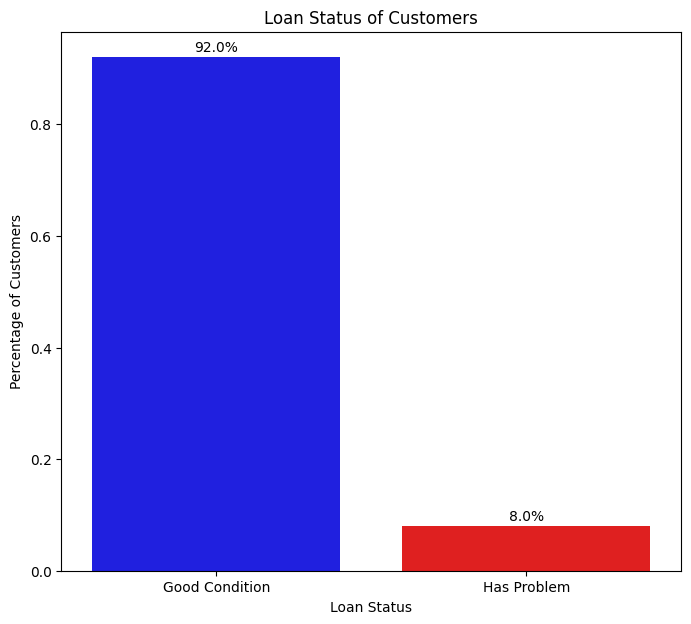

In [10]:
Customers['TARGET'] = Customers['TARGET'].map({0: 'Good Condition', 1: 'Has Problem'})

plt.figure(figsize=(8, 7))
ax = sns.barplot(x='TARGET', y='Percentage', data=Customers, hue='TARGET', palette=['blue', 'red'], dodge=False, legend=False)
plt.title('Loan Status of Customers')
plt.xlabel('Loan Status')
plt.ylabel('Percentage of Customers')


for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.01,
            '{:.1f}%'.format(height * 100),
            ha="center")

plt.show()

#### Loan Status based on marital status

In [11]:
Marital_Status= df.groupby('Status_of_Marital')['TARGET'].value_counts().reset_index(name='Customers')
Marital_Status.rename(columns={'CODE_GENDER': 'Customers'}, inplace=True)
Marital_Status['Percentage']= round(Marital_Status['Customers'] / Marital_Status['Customers'].sum(), 2)
target_mapping = {
    1: 'Has Problem',
    0: 'Good Condition'
}
Marital_Status['TARGET']= Marital_Status['TARGET'].map(target_mapping)
Marital_Status

,Status_of_Marital,TARGET,Customers,Percentage
0,Married,Good Condition,208392,0.68
1,Married,Has Problem,17811,0.06
2,Not Married,Good Condition,74288,0.24
3,Not Married,Has Problem,7014,0.02


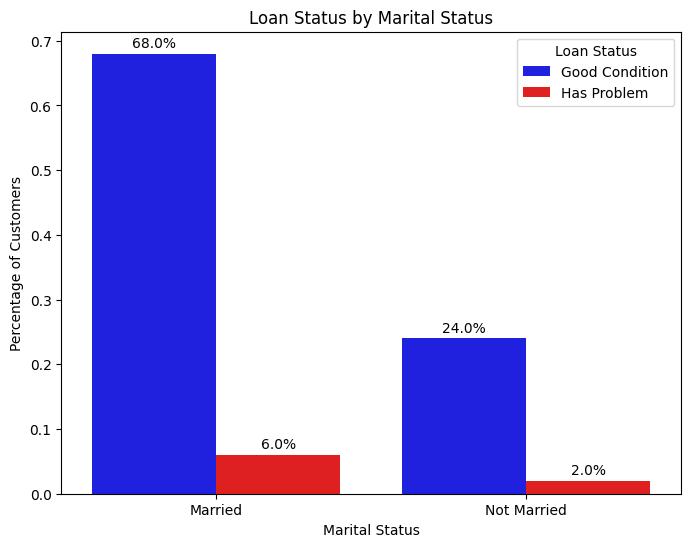

In [12]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Status_of_Marital', y='Percentage', hue='TARGET', data=Marital_Status, palette=['blue', 'red'], dodge=True)
plt.title('Loan Status by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Percentage of Customers')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 0.01,
                '{:.1f}%'.format(height * 100),
                ha="center")

plt.legend(title='Loan Status')
plt.show()

#### Loan status by age group

In [13]:
#Age Group
df['Age'] =  np.floor(df['DAYS_BIRTH'] / -365).astype(int)
df.drop(columns= 'DAYS_BIRTH', inplace=True)

In [14]:
def categorize_age(age):
    if age <= 35:
        return 'Early Adult'
    elif age <= 50:
        return  'Adult'
    elif age <= 65:
        return 'Older Adult'

df['Age_Category'] = df['Age'].apply(categorize_age)

category_age = df.groupby(['Age_Category', 'TARGET'])['CODE_GENDER'].count().reset_index()
category_age.rename(columns={'CODE_GENDER': 'Customers'}, inplace=True)


category_age['Percentage'] = category_age.groupby('Age_Category')['Customers'].transform(lambda x: (x / x.sum()) * 100)


target_mapping = {
    1: 'Has Problem',
    0: 'Good Condition'
}
category_age['TARGET'] = category_age['TARGET'].map(target_mapping)
category_age

,Age_Category,TARGET,Customers,Percentage
0,Adult,Good Condition,108677,92.036755
1,Adult,Has Problem,9403,7.963245
2,Early Adult,Good Condition,82286,89.209553
3,Early Adult,Has Problem,9953,10.790447
4,Older Adult,Good Condition,86877,94.250193
5,Older Adult,Has Problem,5300,5.749807


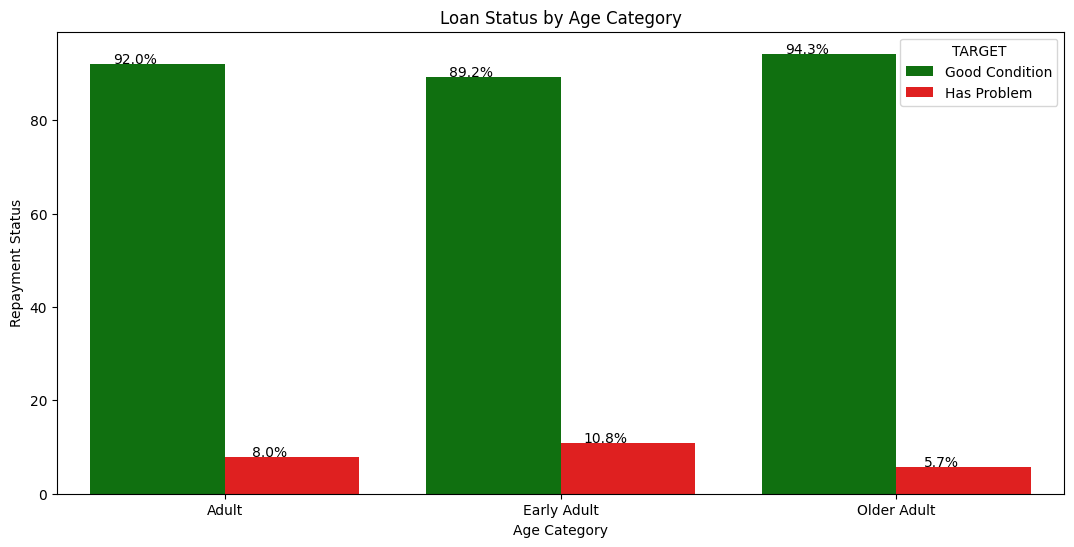

In [15]:

plt.figure(figsize=(13, 6))
ax = sns.barplot(data=category_age, x='Age_Category', y='Percentage', hue='TARGET',
            palette=['green', 'red'])


for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 3.,
                height + 0.11,
                '{:.1f}%'.format(height),
                ha="center")

plt.xlabel('Age Category')
plt.ylabel('Repayment Status')
plt.title('Loan Status by Age Category')
plt.show()


#### Income Type

In [16]:

itp = df.groupby(['TARGET', 'NAME_INCOME_TYPE', 'NAME_CONTRACT_TYPE'])['CODE_GENDER'].count().reset_index().sort_values(['NAME_INCOME_TYPE', 'NAME_CONTRACT_TYPE']).reset_index()
itp.rename(columns = {'CODE_GENDER' : 'Customers'}, inplace=True)
itp.drop(columns = 'index', inplace=True)

income_type   = list(itp['NAME_INCOME_TYPE'].unique())
percentage  = []

for i in income_type:
    data = itp[itp.NAME_INCOME_TYPE == i]
    contract_type = list(data['NAME_CONTRACT_TYPE'].unique())
    for x in contract_type:
        data2 = data[data.NAME_CONTRACT_TYPE == x]
        total = data2['Customers'].sum()
        for y,z in enumerate(data2['Customers']):
            pct = round(z / total, 2)
            percentage.append(pct)

itp['percentage'] = percentage
itp

,TARGET,NAME_INCOME_TYPE,NAME_CONTRACT_TYPE,Customers,percentage
0,0,Businessman,Revolving loans,10,1.00
1,0,Commercial associate,Cash loans,58662,0.92
2,1,Commercial associate,Cash loans,4990,0.08
3,0,Commercial associate,Revolving loans,7592,0.95
4,1,Commercial associate,Revolving loans,370,0.05
5,1,Maternity leave,Cash loans,2,1.00
6,0,Maternity leave,Revolving loans,3,1.00
7,0,Pensioner,Cash loans,49151,0.95
8,1,Pensioner,Cash loans,2842,0.05
9,0,Pensioner,Revolving loans,3229,0.96


In [17]:
df[['NAME_INCOME_TYPE','TARGET']].groupby(['NAME_INCOME_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_INCOME_TYPE,TARGET
2,Maternity leave,0.400000
6,Unemployed,0.363636
7,Working,0.095887
1,Commercial associate,0.074846
4,State servant,0.057550
3,Pensioner,0.053864
0,Businessman,0.000000
5,Student,0.000000


#### Loan Contract Type

In [18]:
contract_type = (df.groupby(['NAME_CONTRACT_TYPE', 'TARGET'])['CODE_GENDER']
                 .count()
                 .reset_index()
                 .sort_values(by='NAME_CONTRACT_TYPE')
                 .reset_index(drop=True))

contract_type.rename(columns={'CODE_GENDER': 'Customers Count'}, inplace=True)

contract_name = list(contract_type['NAME_CONTRACT_TYPE'].unique())
percentage = []

for i in contract_name:
    data = contract_type[contract_type['NAME_CONTRACT_TYPE'] == i]
    total = data['Customers Count'].sum()
    for _, y in enumerate(data['Customers Count']):
        pct = round(y / total, 2)
        percentage.append(pct)

contract_type['Percent'] = percentage
contract_type['Percent All'] = round(contract_type['Customers Count'] / contract_type['Customers Count'].sum(), 2)

mapping_target_contract = {1: 'Has Problem', 0: 'Good Condition'}
contract_type['TARGET'] = contract_type['TARGET'].map(mapping_target_contract)
contract_type

,NAME_CONTRACT_TYPE,TARGET,Customers Count,Percent,Percent All
0,Cash loans,Good Condition,255011,0.92,0.83
1,Cash loans,Has Problem,23221,0.08,0.08
2,Revolving loans,Good Condition,27669,0.95,0.09
3,Revolving loans,Has Problem,1604,0.05,0.01


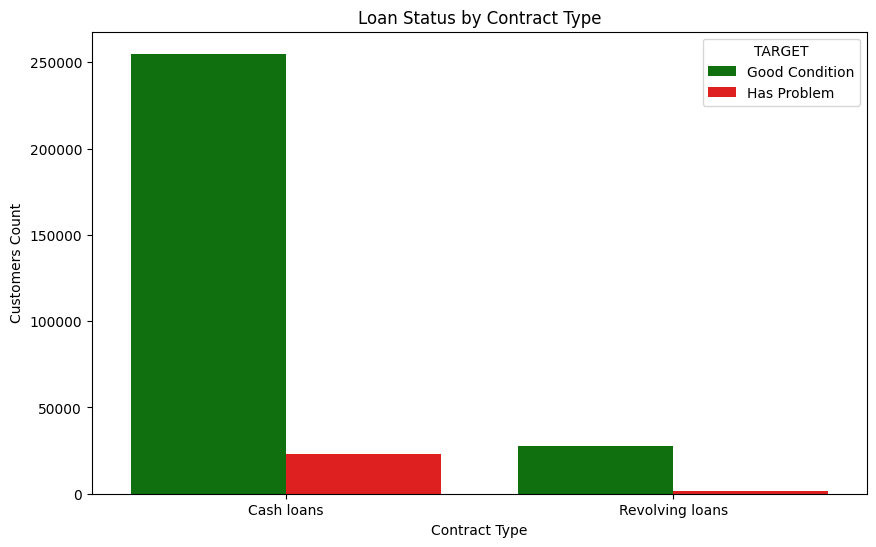

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(data=contract_type, x='NAME_CONTRACT_TYPE', y='Customers Count', hue='TARGET',
            palette=['green', 'red'])
plt.xlabel('Contract Type')
plt.ylabel('Customers Count')
plt.title('Loan Status by Contract Type')
plt.show()

#### Occupation Type

In [20]:
occupation = (df.groupby(['OCCUPATION_TYPE', 'TARGET'])['CODE_GENDER']
               .count()
               .reset_index()
               .sort_values(by='OCCUPATION_TYPE')
               .reset_index(drop=True))

occupation.rename(columns={'CODE_GENDER': 'Customers Count'}, inplace=True)


occupation_name = list(occupation['OCCUPATION_TYPE'].unique())
percentage = []

for i in occupation_name:
    data = occupation[occupation['OCCUPATION_TYPE'] == i]
    total = data['Customers Count'].sum()
    for _, y in enumerate(data['Customers Count']):
        pct = round(y / total, 2)
        percentage.append(pct)

occupation['Percent'] = percentage
occupation['Percent All'] = round(occupation['Customers Count']/ total, 2)

mapping_target_occupation = {1: ' Problem', 0: 'Good Condition'}
occupation['TARGET'] = occupation['TARGET'].map(mapping_target_occupation)
occupation

,OCCUPATION_TYPE,TARGET,Customers Count,Percent,Percent All
0,Accountants,Good Condition,9338,0.95,6.93
1,Accountants,Problem,474,0.05,0.35
2,Cleaning staff,Good Condition,4206,0.90,3.12
3,Cleaning staff,Problem,447,0.10,0.33
4,Cooking staff,Good Condition,5325,0.90,3.95
5,Cooking staff,Problem,621,0.10,0.46
6,Core staff,Good Condition,25831,0.94,19.16
7,Core staff,Problem,1738,0.06,1.29
8,Drivers,Good Condition,16496,0.89,12.24
9,Drivers,Problem,2107,0.11,1.56


In [21]:
df[['OCCUPATION_TYPE','TARGET']].groupby(['OCCUPATION_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,OCCUPATION_TYPE,TARGET
9,Low-skill Laborers,0.171606
4,Drivers,0.113261
17,Waiters/barmen staff,0.112760
16,Security staff,0.107424
8,Laborers,0.105788
2,Cooking staff,0.104440
14,Sales staff,0.096318
1,Cleaning staff,0.096067
13,Realty agents,0.078562
15,Secretaries,0.070498


#### Contract Type, Children, Own Car, Own realty

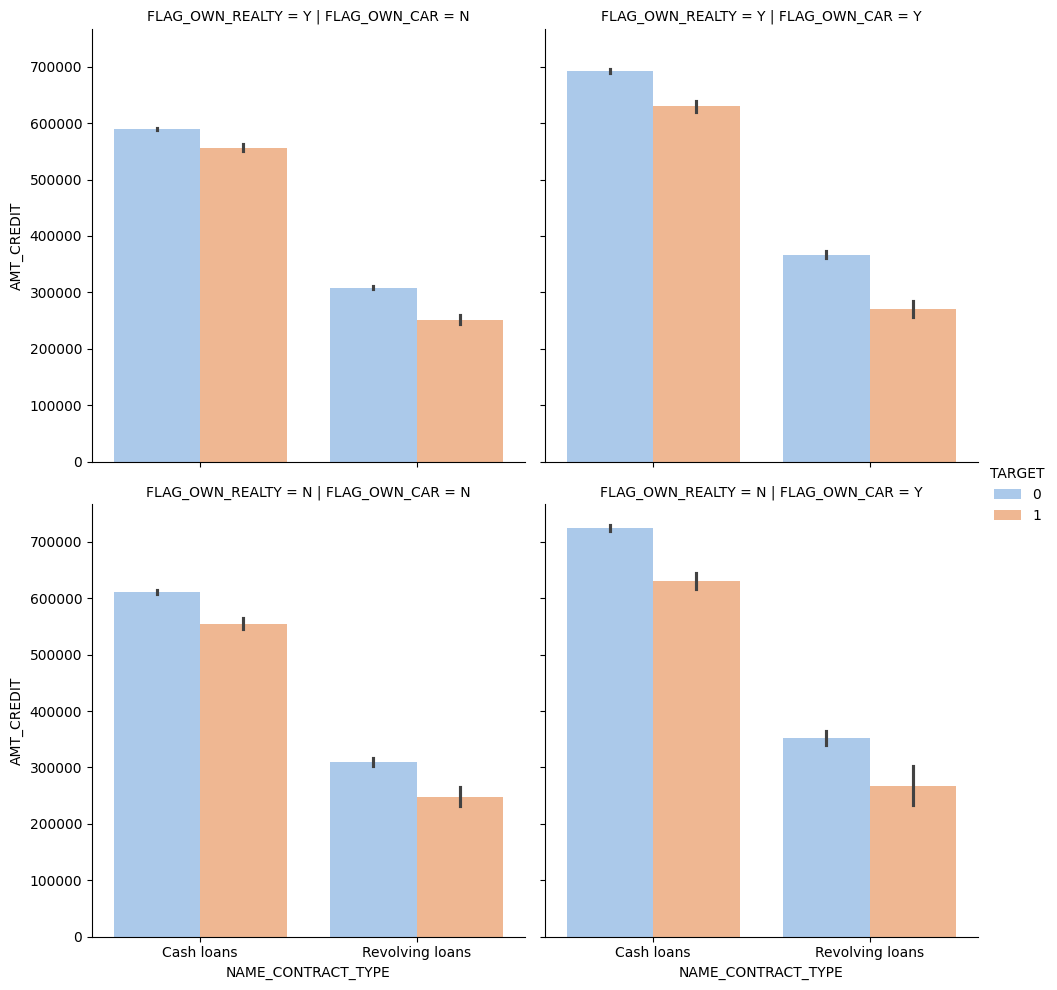

In [22]:
sns.catplot(x='NAME_CONTRACT_TYPE',
            y='AMT_CREDIT',
            hue='TARGET',
            col='FLAG_OWN_CAR',
            row='FLAG_OWN_REALTY',
            kind='bar',
            palette='pastel',
            data=df)

plt.show()


#### Contract Type, Total Income, Education Type

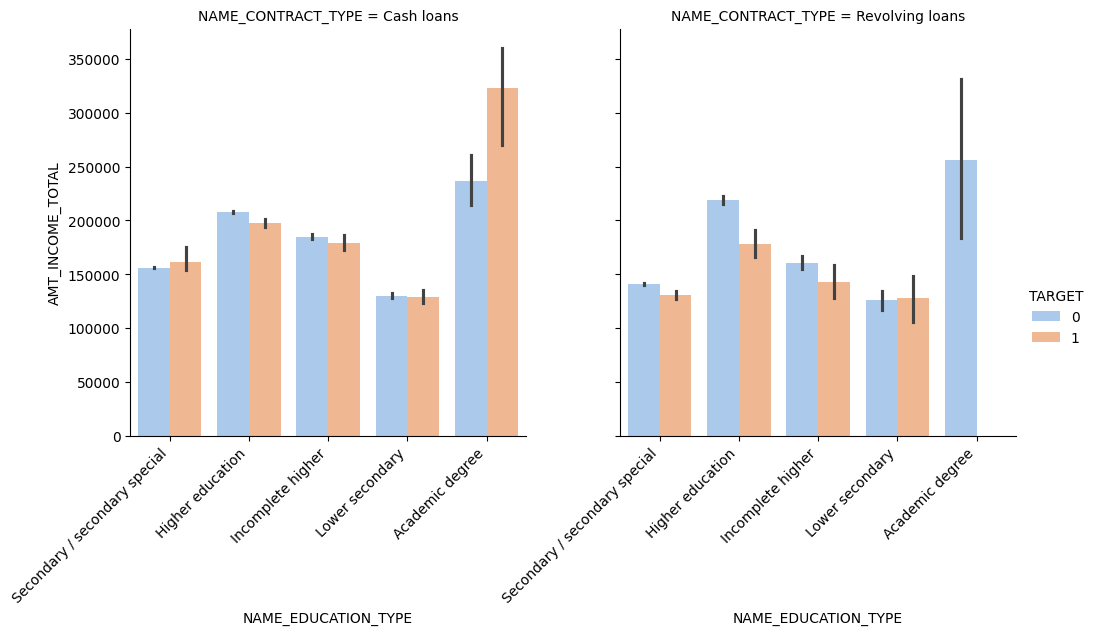

In [23]:
fig= sns.catplot(x='NAME_EDUCATION_TYPE',
            y='AMT_INCOME_TOTAL',
            hue='TARGET',
            col='NAME_CONTRACT_TYPE',
            kind='bar',
            palette='pastel',
            data=df)
fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

#### Marital Status, Age Category, Amount Credit

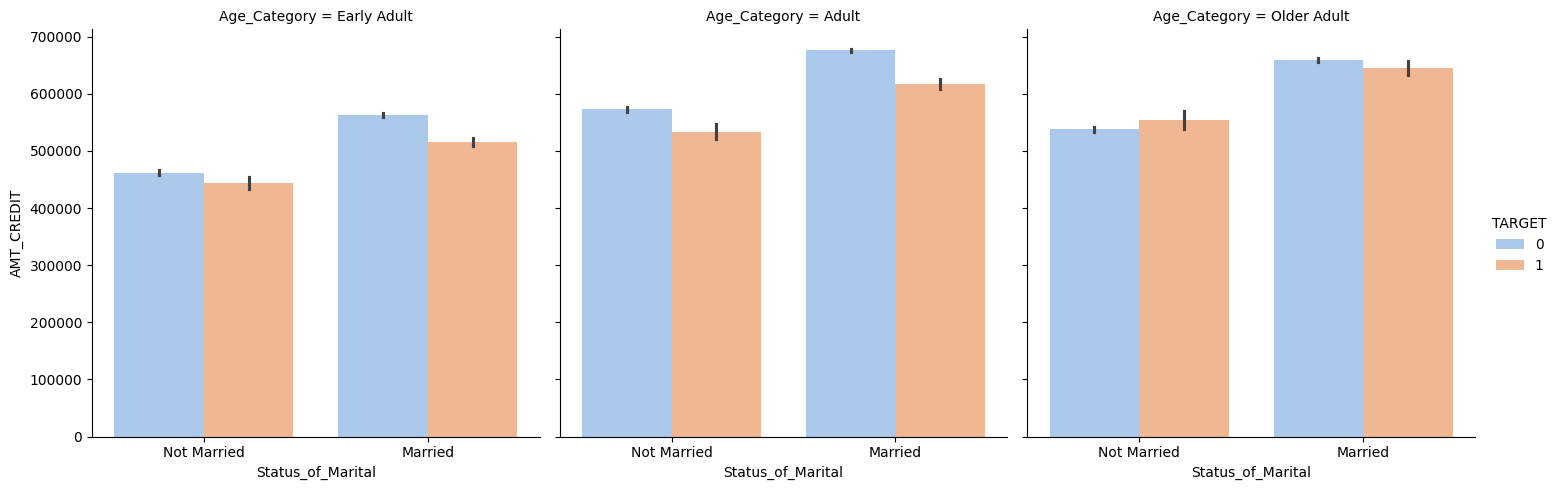

In [24]:
sns.catplot(x='Status_of_Marital',
            y='AMT_CREDIT',
            hue='TARGET',
            col='Age_Category',
            kind='bar',
            palette='pastel',
            data=df)

plt.show()

## Data Cleaning

In [25]:
df.duplicated().sum()
print('Duplicated Amount:', df.duplicated().sum())

Duplicated Amount: 0


### Missing Value

In [26]:
missing_percentage= (df.isnull().sum()/df.shape[0])*100
missing_percentage.sort_values(ascending=True)

,0
SK_ID_CURR,0.000000
REG_REGION_NOT_WORK_REGION,0.000000
LIVE_REGION_NOT_WORK_REGION,0.000000
REG_CITY_NOT_LIVE_CITY,0.000000
REG_CITY_NOT_WORK_CITY,0.000000
LIVE_CITY_NOT_WORK_CITY,0.000000
ORGANIZATION_TYPE,0.000000
FLAG_DOCUMENT_20,0.000000
FLAG_DOCUMENT_19,0.000000
FLAG_DOCUMENT_18,0.000000


### Drop Missing Value >50%

In [27]:
def drop_columns(df):
    missing_percentage= (df.isnull().sum()/df.shape[0])*100
    col_drop = missing_percentage[missing_percentage > 50].index
    df= df.drop(columns= col_drop)
    return df

df= drop_columns(df)
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Status_of_Marital,Age,Age_Category
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,House / apartment,0.018801,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Not Married,25,Early Adult
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,House / apartment,0.003541,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Married,45,Adult
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,House / apartment,0.010032,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Not Married,52,Older Adult
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,House / apartment,0.008019,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Married,52,Older Adult
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,House / apartment,0.028663,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Not Married,54,Older Adult


In [28]:
print('Post Column Drop:', df.isnull().values.any())


null_count = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])

null_count['Percentage'] = (null_count['Total Null Values'] / df.shape[0]) * 100
null_count = null_count.sort_values(by=['Percentage'], ascending=False).reset_index()
print(null_count)


Post Column Drop: True
                           index  Total Null Values  Percentage
0                  FLOORSMAX_AVG             153018   49.761142
1                 FLOORSMAX_MODE             153018   49.761142
2                 FLOORSMAX_MEDI             153018   49.761142
3    YEARS_BEGINEXPLUATATION_AVG             150005   48.781321
4   YEARS_BEGINEXPLUATATION_MODE             150005   48.781321
5   YEARS_BEGINEXPLUATATION_MEDI             150005   48.781321
6                 TOTALAREA_MODE             148429   48.268809
7            EMERGENCYSTATE_MODE             145753   47.398579
8                OCCUPATION_TYPE              96389   31.345507
9                   EXT_SOURCE_3              60964   19.825369
10    AMT_REQ_CREDIT_BUREAU_YEAR              41518   13.501569
11     AMT_REQ_CREDIT_BUREAU_QRT              41518   13.501569
12     AMT_REQ_CREDIT_BUREAU_MON              41518   13.501569
13    AMT_REQ_CREDIT_BUREAU_WEEK              41518   13.501569
14     AMT_REQ_CR

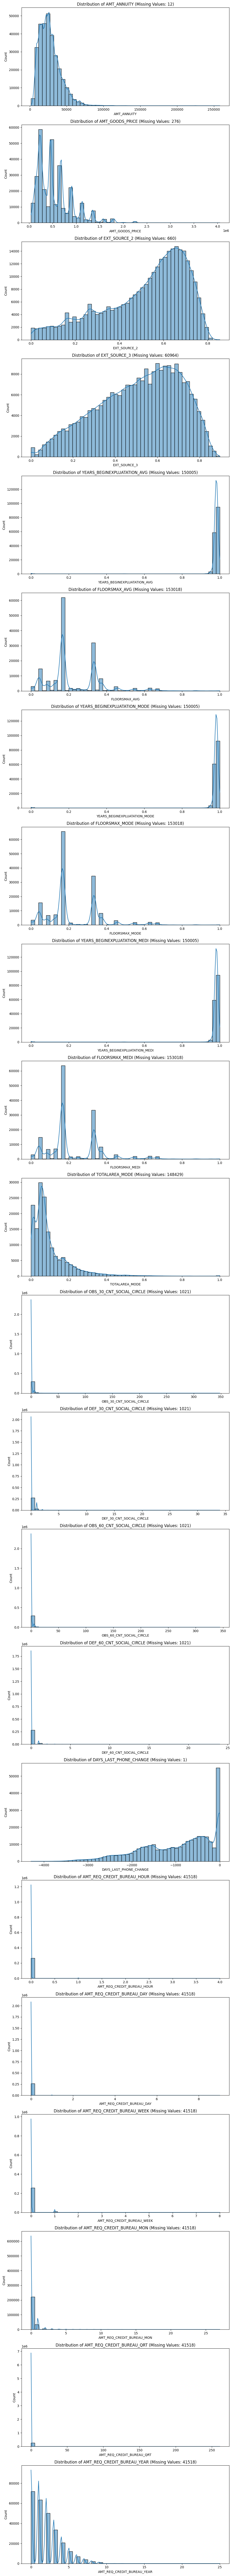

In [29]:
# Identifying numerical columns with missing values
num_missing_cols = df.select_dtypes(include=['int64', 'float64'])
num_missing_cols = num_missing_cols.columns[num_missing_cols.isnull().sum() > 0]

fig, axes = plt.subplots(len(num_missing_cols), 1, figsize=(10, 5 * len(num_missing_cols)))

for i, col in enumerate(num_missing_cols):
    sns.histplot(df[col], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col} (Missing Values: {df[col].isnull().sum()})")

plt.tight_layout()
plt.show()

### Imputation

In [30]:
category_columns = df.select_dtypes(include=['object']).columns.tolist()
integer_columns = df.select_dtypes(include=['int64','float64']).columns.tolist()

for column in df:
    if df[column].isnull().any():
        if column in category_columns:
            df[column] = df[column].fillna(df[column].mode().iloc[0])
        else:
            df[column] = df[column].fillna(df[column].median())

print("Post Imputation Missing Values:", df.isnull().sum().sum())


Post Imputation Missing Values: 0


### Outlier

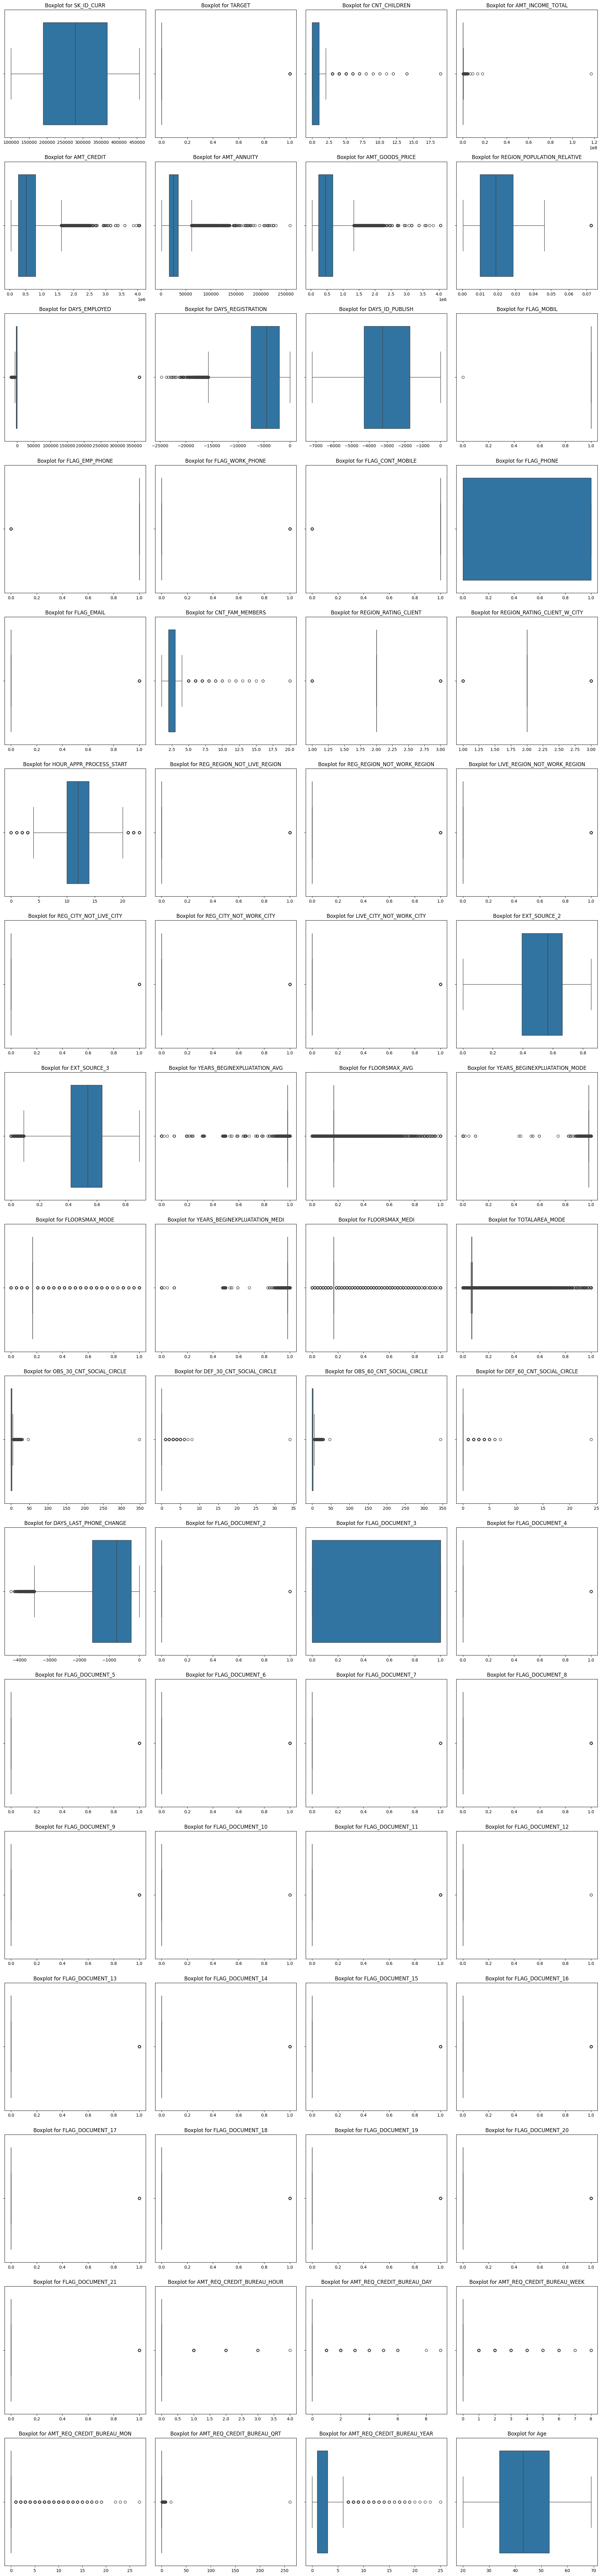

In [31]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()


num_cols = len(numerical_columns)
fig, axes = plt.subplots(nrows=int(np.ceil(num_cols / 4)), ncols=4, figsize=(20, 5 * int(np.ceil(num_cols / 4))))
axes = axes.flatten()


for i, col in enumerate(numerical_columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f"Boxplot for {col}")
    axes[i].set_xlabel("")


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [32]:
# prompt: remove outlier cnt children

import numpy as np

df['CNT_CHILDREN_zscore'] = np.abs((df['CNT_CHILDREN'] - df['CNT_CHILDREN'].mean()) / df['CNT_CHILDREN'].std())


df = df[df['CNT_CHILDREN_zscore'] < 3]

df = df.drop('CNT_CHILDREN_zscore', axis=1)


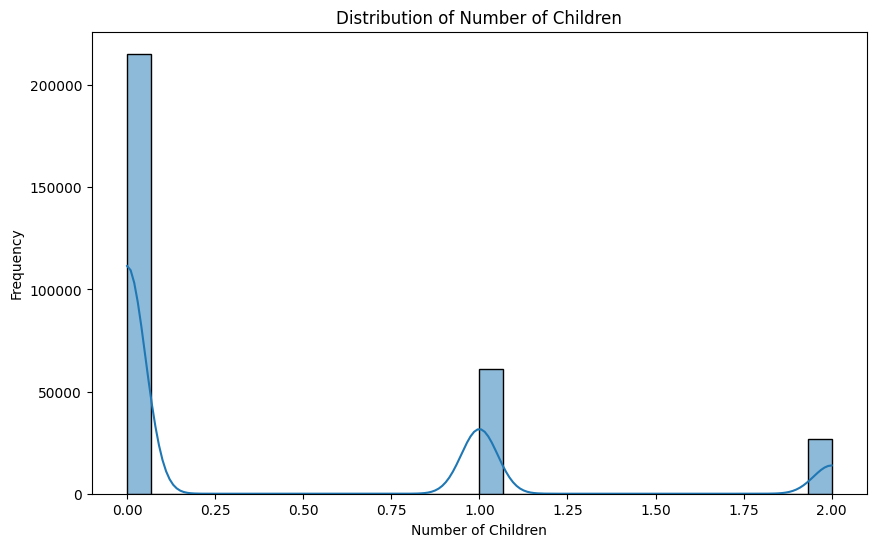

In [33]:

plt.figure(figsize=(10, 6))
sns.histplot(df['CNT_CHILDREN'], bins=30, kde=True)
plt.title('Distribution of Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Frequency')
plt.show()


In [34]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

pd.set_option("display.max_columns", None)
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Status_of_Marital,Age,Age_Category
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,6,7,4,1,0.018801,-637,-3648.0,-2120,1,1,0,1,1,0,8,1.0,2,2,6,10,0,0,0,0,0,0,5,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,0,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1,25,1
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,4,1,1,0.003541,-1188,-1186.0,-291,1,1,0,1,1,0,3,2.0,1,1,1,11,0,0,0,0,0,0,39,0.622246,0.535276,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,0,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,45,0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,6,7,4,1,0.010032,-225,-4260.0,-2531,1,1,1,1,1,0,8,1.0,2,2,1,9,0,0,0,0,0,0,11,0.555912,0.729567,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0688,0,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,52,2
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,6,7,4,1,0.008019,-3039,-9833.0,-2437,1,1,0,1,0,0,8,2.0,2,2,6,17,0,0,0,0,0,0,5,0.650442,0.535276,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0688,0,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,52,2
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,6,7,4,1,0.028663,-3038,-4311.0,-3458,1,1,0,1,0,0,3,1.0,2,2,4,11,0,0,0,0,1,1,37,0.322738,0.535276,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0688,0,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,54,2


### Drop Unnecessary Features

In [35]:
df.drop(['SK_ID_CURR'], inplace=True, axis=1)

In [36]:
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Status_of_Marital,Age,Age_Category
0,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,6,7,4,1,0.018801,-637,-3648.0,-2120,1,1,0,1,1,0,8,1.0,2,2,6,10,0,0,0,0,0,0,5,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,0,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1,25,1
1,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,4,1,1,0.003541,-1188,-1186.0,-291,1,1,0,1,1,0,3,2.0,1,1,1,11,0,0,0,0,0,0,39,0.622246,0.535276,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,0,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,45,0
2,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,6,7,4,1,0.010032,-225,-4260.0,-2531,1,1,1,1,1,0,8,1.0,2,2,1,9,0,0,0,0,0,0,11,0.555912,0.729567,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0688,0,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,52,2
3,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,6,7,4,1,0.008019,-3039,-9833.0,-2437,1,1,0,1,0,0,8,2.0,2,2,6,17,0,0,0,0,0,0,5,0.650442,0.535276,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0688,0,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,52,2
4,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,6,7,4,1,0.028663,-3038,-4311.0,-3458,1,1,0,1,0,0,3,1.0,2,2,4,11,0,0,0,0,1,1,37,0.322738,0.535276,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0688,0,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,54,2


### Convert Negative Values to Positive

In [37]:
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].abs()
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Status_of_Marital,Age,Age_Category
0,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,6,7,4,1,0.018801,637,3648.0,2120,1,1,0,1,1,0,8,1.0,2,2,6,10,0,0,0,0,0,0,5,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,0,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1,25,1
1,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,4,1,1,0.003541,1188,1186.0,291,1,1,0,1,1,0,3,2.0,1,1,1,11,0,0,0,0,0,0,39,0.622246,0.535276,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,0,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,45,0
2,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,6,7,4,1,0.010032,225,4260.0,2531,1,1,1,1,1,0,8,1.0,2,2,1,9,0,0,0,0,0,0,11,0.555912,0.729567,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0688,0,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,52,2
3,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,6,7,4,1,0.008019,3039,9833.0,2437,1,1,0,1,0,0,8,2.0,2,2,6,17,0,0,0,0,0,0,5,0.650442,0.535276,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0688,0,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,52,2
4,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,6,7,4,1,0.028663,3038,4311.0,3458,1,1,0,1,0,0,3,1.0,2,2,4,11,0,0,0,0,1,1,37,0.322738,0.535276,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0688,0,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,54,2


In [38]:
x=df.drop('TARGET', axis=1)
y=df['TARGET']

### Scaler

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = x.select_dtypes(include=['int64', 'float64']).columns

x[numerical_cols] = scaler.fit_transform(x[numerical_cols])

x.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Status_of_Marital,Age,Age_Category
0,-0.324155,1.390289,-0.715531,0.665122,-0.589198,0.141635,-0.477747,-0.165350,-0.506968,0.438006,0.919459,0.625850,-0.305698,-0.150749,-0.484524,-0.385840,-0.577302,0.001816,0.472155,-0.496986,0.043282,1.598771,-0.245046,0.027520,-1.320955,-0.101492,-0.061052,1.353004,-0.632844,-0.124371,-0.23145,-0.205894,-0.291284,-0.545479,-0.465771,-1.196173,-1.320389,-2.155783,-0.174124,-1.062121,-0.152451,-1.054978,-0.172362,-1.057995,-0.901543,-0.08727,0.243346,4.165269,0.252588,5.255975,0.206167,-0.006548,0.640337,-0.00908,-0.124015,-0.312786,-0.013712,-0.297074,-0.06245,-0.004805,-0.0629,-0.002568,-0.059507,-0.0545,-0.034858,-0.100247,-0.016346,-0.090623,-0.024439,-0.022541,-0.018433,-0.071111,-0.058754,-0.1558,-0.270041,-0.307918,-0.441063,1.656401,-1.544689,0.113619
1,-0.324155,-0.719275,-0.715531,-1.503484,-0.589198,0.424756,1.725493,0.594206,1.600717,-2.383634,-0.259624,-1.682692,-0.305698,-1.253776,-0.480591,-1.083627,-1.789285,0.001816,0.472155,-0.496986,0.043282,1.598771,-0.245046,-1.344579,-0.131822,-2.066490,-2.051279,-0.973343,-0.326690,-0.124371,-0.23145,-0.205894,-0.291284,-0.545479,-0.465771,0.462784,0.562975,0.110563,0.129081,0.887615,0.125855,0.916492,0.127412,0.887542,-0.188784,-0.08727,-0.173575,-0.320461,-0.168043,-0.275696,-0.163734,-0.006548,0.640337,-0.00908,-0.124015,-0.312786,-0.013712,-0.297074,-0.06245,-0.004805,-0.0629,-0.002568,-0.059507,-0.0545,-0.034858,-0.100247,-0.016346,-0.090623,-0.024439,-0.022541,-0.018433,-0.071111,-0.058754,-0.1558,-0.270041,-0.307918,-1.007101,-0.603719,0.122822,-1.087796
2,3.084943,1.390289,1.397564,0.665122,-0.589198,-0.424607,-1.152446,-1.405066,-1.091759,0.438006,0.919459,0.625850,-0.305698,-0.784592,-0.487465,-0.212385,-0.304954,0.001816,0.472155,2.012130,0.043282,1.598771,-0.245046,0.027520,-1.320955,-0.101492,-0.061052,-0.973343,-0.938997,-0.124371,-0.23145,-0.205894,-0.291284,-0.545479,-0.465771,-0.903416,0.215267,1.222785,0.046816,-0.281853,0.050345,-0.266011,0.046078,-0.279407,-0.221583,-0.08727,-0.590496,-0.320461,-0.588673,-0.275696,-0.179449,-0.006548,-1.561677,-0.00908,-0.124015,-0.312786,-0.013712,-0.297074,-0.06245,-0.004805,-0.0629,-0.002568,-0.059507,-0.0545,-0.034858,-0.100247,-0.016346,-0.090623,-0.024439,-0.022541,-0.018433,-0.071111,-0.058754,-0.1558,-0.270041,-0.307918,-1.007101,1.656401,0.706451,1.315033
3,-0.324155,-0.719275,-0.715531,0.665122,-0.589198,-0.141486,-0.711049,0.178999,-0.653166,0.438006,0.919459,0.625850,-0.305698,-0.930096,-0.467379,1.367131,-0.367243,0.001816,0.472155,-

## Model Training

Training set shape: (242586, 80) Testing set shape: (60647, 80)


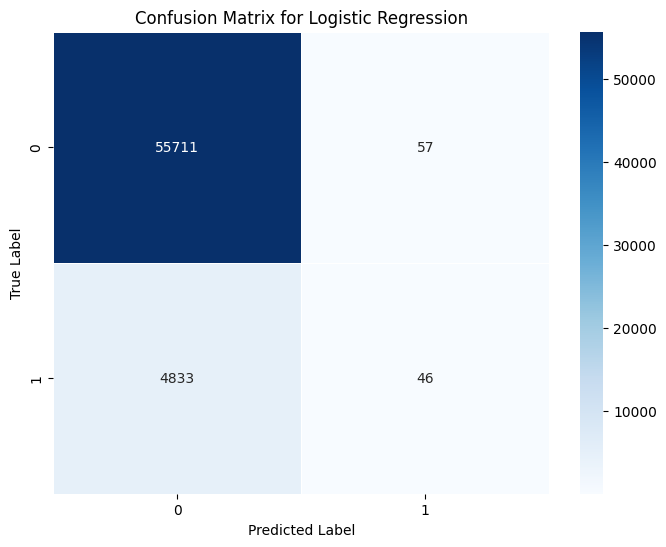

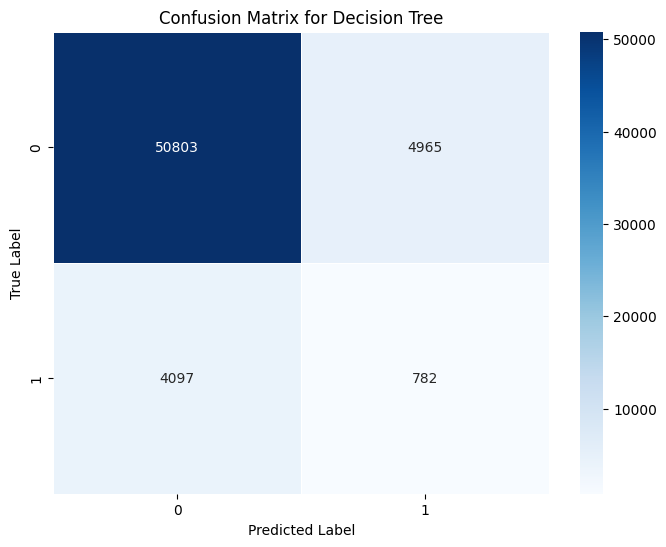

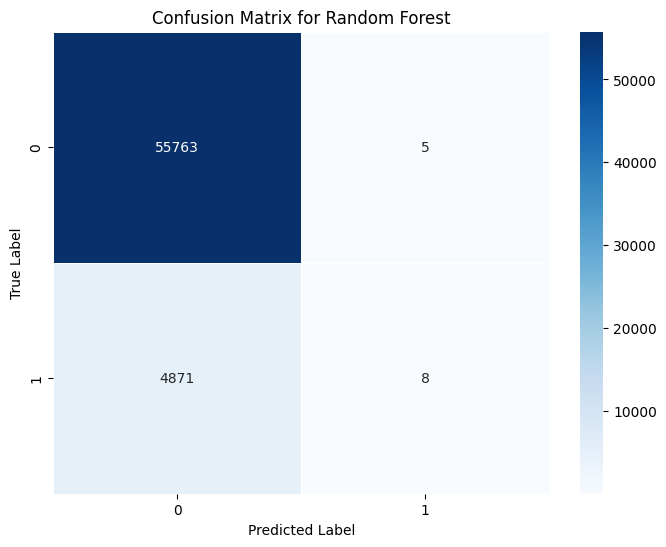

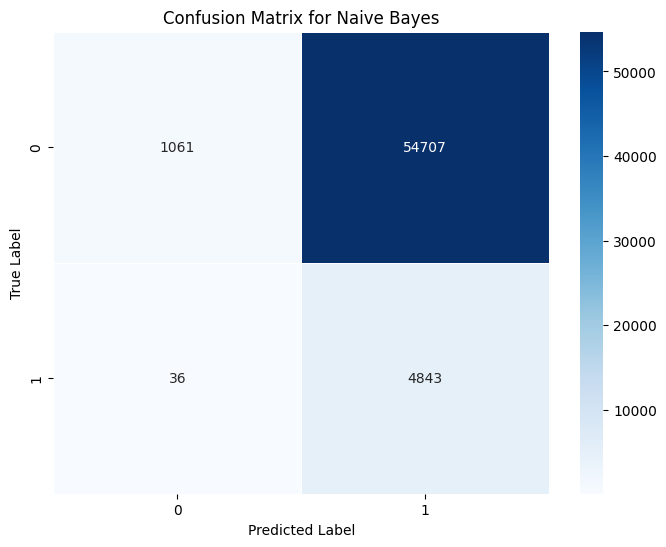

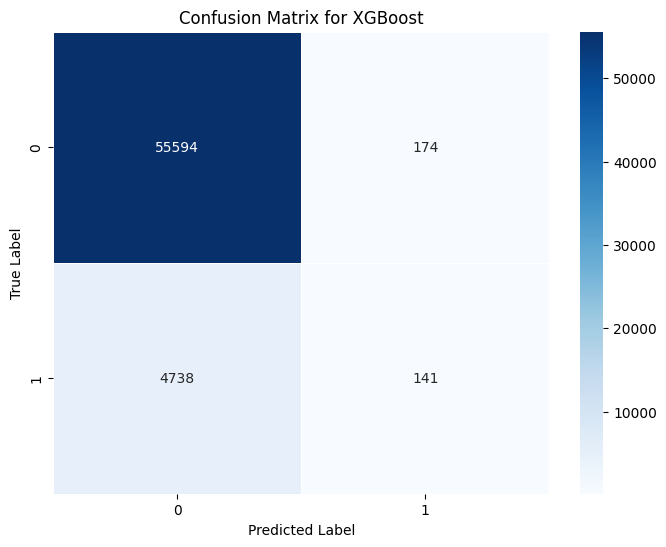


Model: Logistic Regression
Accuracy: 0.9194
ROC-AUC: 0.7395
Precision: 0.4466
Recall: 0.0094
F1-Score: 0.0185
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     55768
           1       0.45      0.01      0.02      4879

    accuracy                           0.92     60647
   macro avg       0.68      0.50      0.49     60647
weighted avg       0.88      0.92      0.88     60647


Model: Decision Tree
Accuracy: 0.8506
ROC-AUC: 0.5356
Precision: 0.1361
Recall: 0.1603
F1-Score: 0.1472
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92     55768
           1       0.14      0.16      0.15      4879

    accuracy                           0.85     60647
   macro avg       0.53      0.54      0.53     60647
weighted avg       0.86      0.85      0.86     60647


Model: Random Forest
Accuracy: 0.9196
ROC-AUC: 0.7093
Precision: 0.6154
Recall: 0.0

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Split dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
print("Training set shape:", x_train.shape, "Testing set shape:", x_test.shape)

# Apply StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier()
}




# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    results[name] = {
        "Accuracy": accuracy,
        "ROC-AUC": roc_auc,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "Confusion Matrix": conf_matrix,
        "Classification Report": class_report
    }

    # Confusion Matrix Visualization
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Print evaluation results
for model, metrics in results.items():
    print(f"\nModel: {model}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"ROC-AUC: {metrics['ROC-AUC']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"F1-Score: {metrics['F1-Score']:.4f}")
    print("Classification Report:")
    print(metrics['Classification Report'])

## Model Evaluation

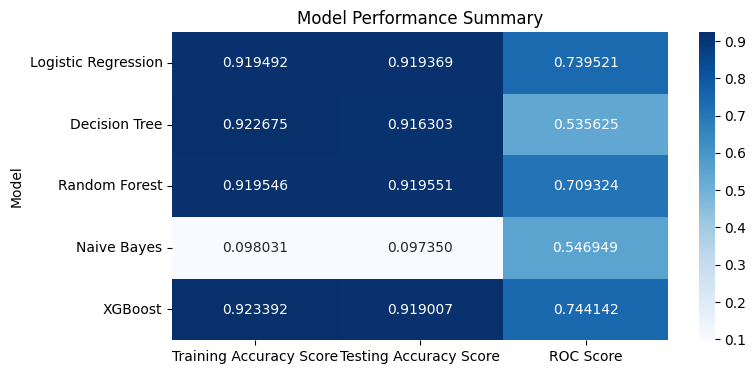

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Ensure results  exists
if 'results' not in globals():
    raise NameError("results dictionary is not defined. Make sure models have been trained and evaluated.")
 # Ensure models exist
if 'models' not in globals():
    raise NameError("models dictionary is not defined. Ensure models are initialized and trained.")

# Apply regularization
if "Decision Tree" in models:
    models["Decision Tree"] = DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)
    models["Decision Tree"].fit(x_train, y_train)

if "Random Forest" in models:
    models["Random Forest"] = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)
    models["Random Forest"].fit(x_train, y_train)


if "Naive Bayes" in models:
    models["Naive Bayes"] = GaussianNB(var_smoothing=1e-9)
    models["Naive Bayes"].fit(x_train, y_train)

summary_df = pd.DataFrame({
    "Model": list(results.keys()),
    "Training Accuracy Score": [accuracy_score(y_train, models[model_name].predict(x_train)) for model_name in results.keys()],
    "Testing Accuracy Score": [accuracy_score(y_test, models[model_name].predict(x_test)) for model_name in results.keys()],
    "ROC Score": [metrics["ROC-AUC"] for metrics in results.values()]
})


summary_df.set_index("Model", inplace=True)


plt.figure(figsize=(8, 4))
sns.heatmap(summary_df, annot=True, cmap="Blues", fmt='.6f')
plt.title("Model Performance Summary")
plt.show()
